<a href="https://colab.research.google.com/github/hubertrykala93/fruit_type_classification_predict/blob/main/fruit_type_classification_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [90]:
np.set_printoptions(suppress=True, edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: f'{x:.8f}'))
np.random.seed(42)

In [91]:
sns.set()

In [92]:
desired_width = 320
pd.options.display.float_format = '{:,.8f}'.format
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 12)

In [93]:
path = '/content/Date_Fruit_Datasets.xlsx'

In [94]:
raw_data = pd.read_excel(io=path, sheet_name='Date_Fruit_Datasets')
data = raw_data.copy()

In [95]:
data.sample(n=10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,...,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
331,143957,"1,452.26200000",523.13680000,352.33050000,0.73920000,428.12590000,...,-34249711616,-23752157184,77.34460000,75.22870000,62.90570000,DOKOL
638,260563,"1,975.37400000",762.50550000,437.85100000,0.81870000,575.98540000,...,-4791147520,-8197618688,16.23040000,22.38600000,28.88600000,SAFAVI
326,154245,"1,503.59800000",546.43660000,361.80180000,0.74940000,443.16010000,...,-14010061824,-14057613312,48.20490000,46.85610000,46.40540000,DOKOL
848,317794,"2,280.96900000",875.58680000,525.33800000,0.80000000,636.10370000,...,-39451316224,-33127270400,58.76960000,54.04760000,50.89770000,SOGAY
39,402279,"2,295.86300000",798.93650000,643.27530000,0.59310000,715.67970000,...,-32178810880,-35126345728,43.77050000,45.61620000,46.30100000,BERHI
327,144207,"1,455.64700000",561.30040000,328.18910000,0.81130000,428.49740000,...,-24426137600,-20047519744,66.70340000,64.30210000,58.51450000,DOKOL
375,414712,"2,341.45800000",808.03150000,654.97300000,0.58560000,726.65520000,...,-30417870848,-30268563456,40.36380000,42.86040000,42.26850000,IRAQI
334,167208,"1,579.17600000",604.15660000,353.46100000,0.81100000,461.40640000,...,-27492392960,-26157553664,70.06790000,63.88540000,61.99650000,DOKOL
208,138061,"1,397.43990000",533.38750000,330.72720000,0.78460000,419.26690000,...,-10830333952,-13359763456,46.11210000,44.66190000,49.23930000,DOKOL
136,209998,"1,728.41200000",619.66170000,433.49650000,0.71460000,517.08580000,...,-22460907520,-20996173824,55.94660000,51.25700000,50.20920000,DEGLET


In [96]:
#Statistics for Dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AREA,898.00000000,"298,295.20712695","107,245.20533696","1,987.00000000","206,948.00000000","319,833.00000000","382,573.00000000","546,063.00000000"
PERIMETER,898.00000000,"2,057.66095345",410.01245926,911.82800000,"1,726.09150000","2,196.34545000","2,389.71657500","2,811.99710000"
MAJOR_AXIS,898.00000000,750.81199410,144.05932568,336.72270000,641.06865000,791.36340000,858.63375000,"1,222.72300000"
MINOR_AXIS,898.00000000,495.87278519,114.26891664,2.28320000,404.68437500,495.05485000,589.03170000,766.45360000
ECCENTRICITY,898.00000000,0.73746782,0.08872739,0.34480000,0.68562500,0.75470000,0.80215000,1.00000000
EQDIASQ,898.00000000,604.57793764,119.59388825,50.29840000,513.31707500,638.14095000,697.93052500,833.82790000
SOLIDITY,898.00000000,0.98184031,0.01815742,0.83660000,0.97882500,0.98730000,0.99180000,0.99740000
CONVEX_AREA,898.00000000,"303,845.59242762","108,815.65694667","2,257.00000000","210,022.75000000","327,207.00000000","388,804.00000000","552,598.00000000"
EXTENT,898.00000000,0.73626715,0.05374518,0.51230000,0.70587500,0.74695000,0.77585000,0.85620000
ASPECT_RATIO,898.00000000,2.13110178,17.82077795,1.06530000,1.37372500,1.52415000,1.67475000,535.52570000


In [97]:
#Basic info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [98]:
#Number of null records
print(f'Null records in columns:\n{data.isnull().sum()}')
print(f'Null records in data: {data.isnull().sum().sum()}')

Null records in columns:
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64
Null records in data: 0


In [99]:
#Data Correlation Matrix
correlation_matrix = data.corr()
print(f'Correlation matrix: {correlation_matrix}')

Correlation matrix:                      AREA   PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY     EQDIASQ  ...   EntropyRR   EntropyRG   EntropyRB  ALLdaub4RR  ALLdaub4RG  ALLdaub4RB
AREA           1.00000000  0.95649358  0.87889347  0.95489867   -0.37030344  0.99324252  ... -0.35933213 -0.39312376 -0.50625572 -0.35344569 -0.38074740 -0.37627664
PERIMETER      0.95649358  1.00000000  0.96073409  0.85998966   -0.16681550  0.95993841  ... -0.26620593 -0.29430814 -0.41680240 -0.45102826 -0.46857092 -0.44840944
MAJOR_AXIS     0.87889347  0.96073409  1.00000000  0.72113330    0.06308984  0.88627739  ... -0.14631144 -0.16797234 -0.29739474 -0.53023116 -0.53849679 -0.50678206
MINOR_AXIS     0.95489867  0.85998966  0.72113330  1.00000000   -0.60712010  0.94800598  ... -0.46677567 -0.50144162 -0.58523354 -0.19625584 -0.23184683 -0.24631185
ECCENTRICITY  -0.37030344 -0.16681550  0.06308984 -0.60712010    1.00000000 -0.33508453  ...  0.43153694  0.46396851  0.44218887 -0.25233114 -0.23887497 -0

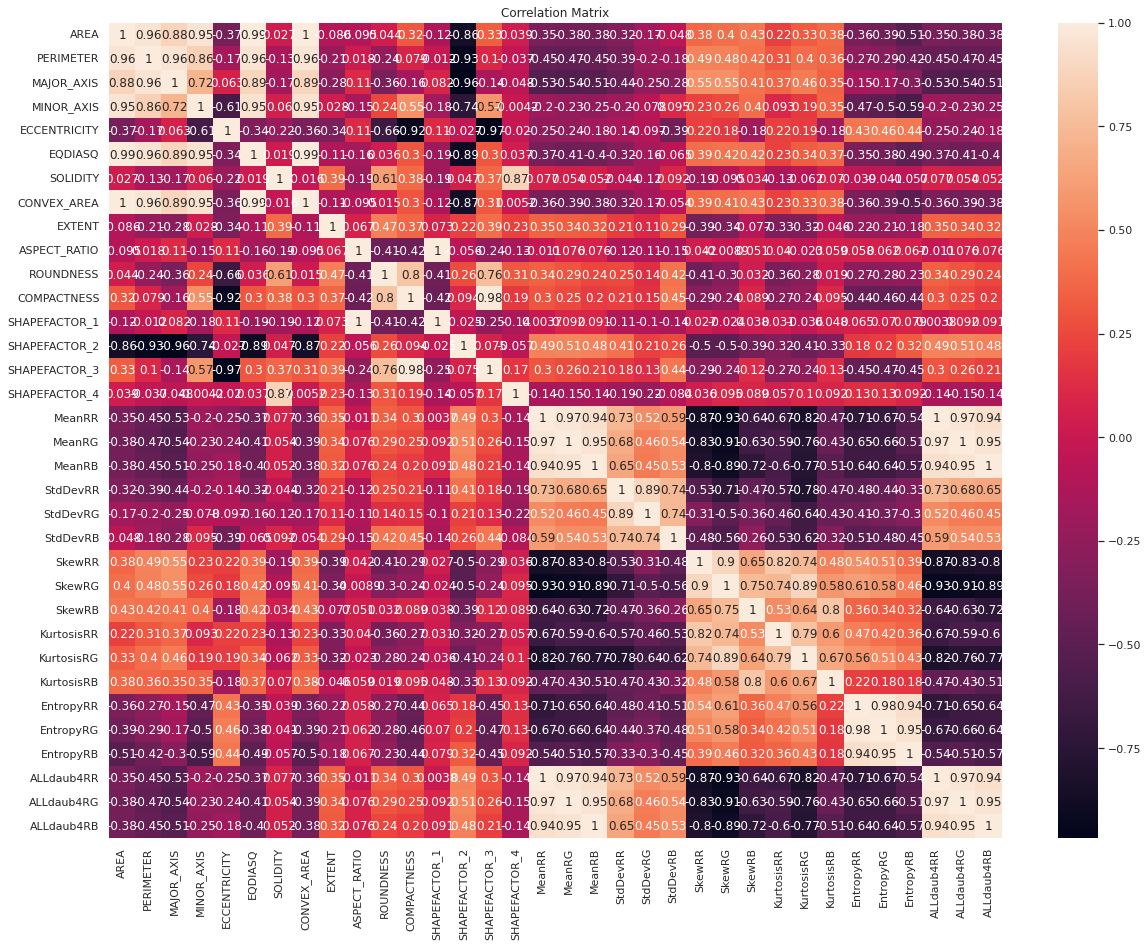

In [100]:
#Heatmap of Correlation Matrix
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.2g')
plt.title(label='Correlation Matrix')
plt.show()

In [101]:
#Distribution of 'Class' column
data['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

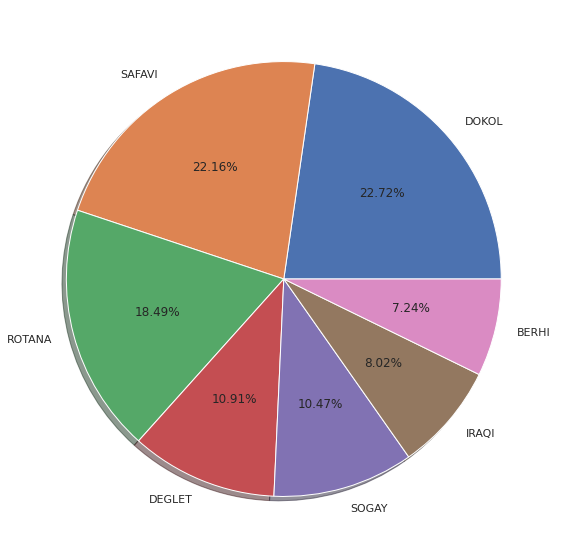

In [102]:
#Pie Chart of 'Class' column
plt.figure(figsize=(12, 10))
plt.pie(x=data['Class'].value_counts(), labels=data['Class'].value_counts().index, shadow=True, autopct='%.2f%%')
plt.show()

In [103]:
#Creating data and target
X = data.drop(columns='Class')
y = data['Class']

In [104]:
#Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
#Checking shape of train and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (673, 34)
X_test shape: (225, 34)
y_train shape: (673,)
y_test shape: (225,)


In [106]:
#Scalling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X=X_train)
X_test = scaler.transform(X=X_test)

In [107]:
#Creating classifier, fitting and predicting
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X=X_train, y=y_train)
y_pred = classifier.predict(X=X_test)
y_pred_proba = classifier.predict_proba(X=X_test)

In [108]:
#Checking finally reports and scores
score = accuracy_score(y_true=y_test, y_pred=y_pred)
report = classification_report(y_true=y_test, y_pred=y_pred)
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

Classifier score: 0.9378


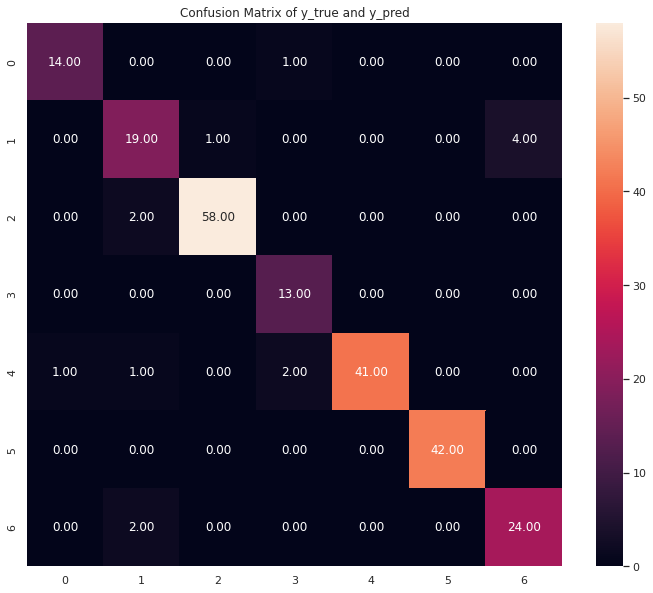

              precision    recall  f1-score   support

       BERHI       0.93      0.93      0.93        15
      DEGLET       0.79      0.79      0.79        24
       DOKOL       0.98      0.97      0.97        60
       IRAQI       0.81      1.00      0.90        13
      ROTANA       1.00      0.91      0.95        45
      SAFAVI       1.00      1.00      1.00        42
       SOGAY       0.86      0.92      0.89        26

    accuracy                           0.94       225
   macro avg       0.91      0.93      0.92       225
weighted avg       0.94      0.94      0.94       225



In [109]:
#Creating confusion matrix heatmap of predictions
print(f'Classifier score: {score:.4f}')

plt.figure(figsize=(12, 10))
sns.heatmap(data=confusion_matrix, annot=True, fmt='.2f')
plt.title(label='Confusion Matrix of y_true and y_pred')
plt.show()

print(report)

In [110]:
#Compare y_true and y_pred in Data Frame
results = pd.DataFrame(data={
    'y_true': y_test,
    'y_pred': y_pred
})

In [111]:
results

,y_true,y_pred
331,DOKOL,DOKOL
638,SAFAVI,SAFAVI
326,DOKOL,DOKOL
848,SOGAY,SOGAY
39,BERHI,BERHI
...,...,...
101,DEGLET,SOGAY
199,DOKOL,DOKOL
851,SOGAY,SOGAY
346,DOKOL,DOKOL


In [112]:
#Creating Data Frame with predict proba
predict_proba = pd.DataFrame(data=classifier.predict_proba(X=X_test), columns=classifier.classes_)

In [113]:
predict_proba

,BERHI,DEGLET,DOKOL,IRAQI,ROTANA,SAFAVI,SOGAY
0,0.00000027,0.01086215,0.98906573,0.00000000,0.00000089,0.00000000,0.00007096
1,0.00000000,0.00001795,0.00000011,0.00000053,0.00000005,0.99997851,0.00000285
2,0.00000296,0.01333095,0.98078507,0.00000001,0.00000213,0.00000286,0.00587602
3,0.00000000,0.00478388,0.00000608,0.00000011,0.00684866,0.00041071,0.98795056
4,0.97089879,0.00000000,0.00000000,0.02909244,0.00000141,0.00000008,0.00000728
...,...,...,...,...,...,...,...
220,0.00134503,0.43692175,0.00306409,0.00164549,0.00186363,0.00086789,0.55429211
221,0.00000000,0.18692362,0.58188696,0.00000000,0.00000833,0.00000044,0.23118064
222,0.00387159,0.00304585,0.00017888,0.00032909,0.00054551,0.00361033,0.98841875
223,0.00000096,0.02595423,0.97332429,0.00000001,0.00000029,0.00010589,0.00061434


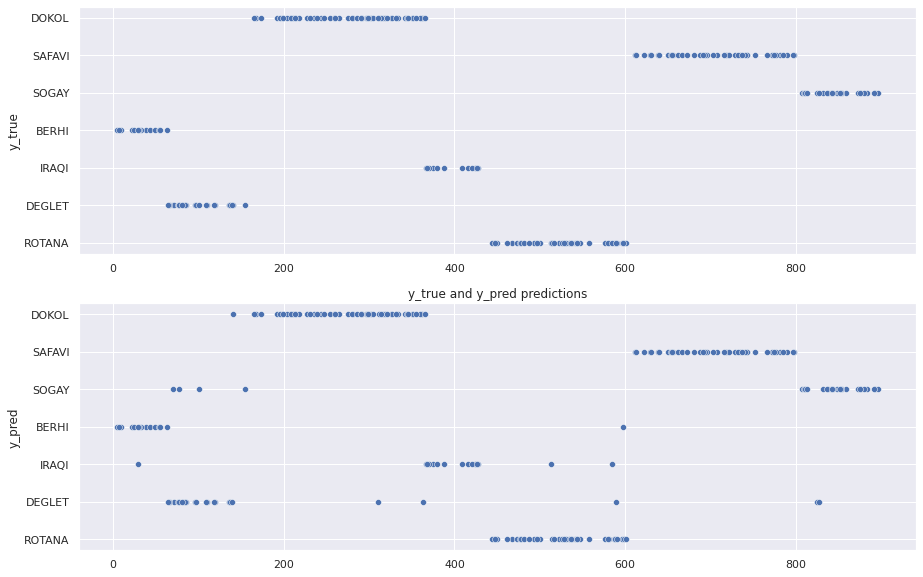

In [116]:
#Scatter plot of predictions
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plt.title(label='y_true and y_pred predictions')
sns.scatterplot(ax=ax[0], x=results.index, y=results['y_true'])
sns.scatterplot(ax=ax[1], x=results.index, y=results['y_pred'])
plt.show()

In [115]:
#Saving results to csv
results.to_csv(path_or_buf='/content/data_fruit_predictions.csv')
predict_proba.to_csv(path_or_buf='/content/data_fruit_predict_proba.csv')